In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/gym4ReaL


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict, defaultdict
import gymnasium as gym
import json

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context("paper")
plot_colors = sns.color_palette('colorblind')
sns.set(font_scale=1.2)

alg_color = OrderedDict({
    'random': plot_colors[1],
    'longest_first': plot_colors[2],
    'shortest_first': plot_colors[3],
    'q-learning': plot_colors[0],
    'sarsa': plot_colors[4],
    'dqn': plot_colors[5],
    'ppo': plot_colors[6],
    'fqi': plot_colors[7]
})

alg_markers = OrderedDict({
    'random': '.',
    'longest_first': 'o',
    'shortest_first': 's',
    'q-learning': 's',
    'sarsa': 's',
})

alg_labels = {
    'random': 'Random',
    'longest_first': 'LF',
    'shortest_first': 'SF',
    'q-learning': 'Q-Learning',
    'sarsa': 'SARSA',
    'dqn': 'DQN',
    'ppo': 'PPO',
    'fqi': 'FQI'
}

In [4]:
res = {}

with open('examples/wds/eval_results/results.json', 'r') as f:
    res['dqn'] = json.load(f)

In [5]:
timesteps = np.arange(0, 8*168*100, 8*168)

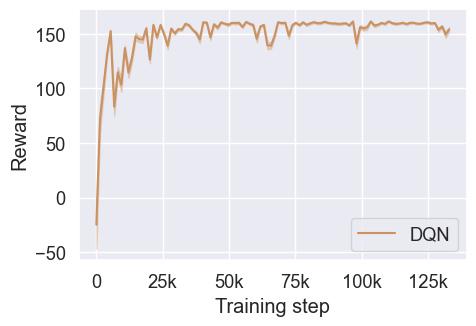

In [6]:
import matplotlib.ticker as ticker

alg = 'dqn'

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

means = np.mean(list(res[alg].values()), axis=1)
stds = np.std(list(res[alg].values()), axis=1)
ci = 1.96 * stds / np.sqrt(len(res[alg].keys()))
    
ax.plot(timesteps, means, label=alg_labels[alg], color=alg_color[alg])
ax.fill_between(timesteps, means + ci, means - ci, color=alg_color[alg], alpha=0.3)

# Custom formatter function
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}k'
    else:
        return str(int(x))

# Set axis labels
ax.set_xlabel("Training step")
ax.set_ylabel("Reward")
#ax.set_xticks(np.arange(0, max(timesteps)+1, 5000000))
#ax.set_xticklabels([str(val) for val in np.arange(0, max(timesteps)+1, 5000000)])

# Apply formatter
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


# Set scientific notation for y-axis
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add legend
ax.legend()

# Save figure
plt.savefig('plots/wds_curves.pdf')